**Kaggle link:** https://www.kaggle.com/yasserh/breast-cancer-dataset

# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 9. Correlation, Feature Scaling & Feature Engineering</u></b><center>

## **DATASET INFORMATION**

+ Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
---
+ The key challenge against its detection is how to classify tumors into malignant (cancerous) or benignant(non-cancerous). The Dataset is from Breast Cancer Wisconsin (Diagnostic).
---
+ The mean, standard error (SE), and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
---



 + **ID:** Patient identification
 + **DIAGNOSIS:** Patient's cancer diagnosis (Malignant or Beningnat)
 + **RADIUS:** radius (mean of distances from center to points on the perimeter)
 + **TEXTURE:** texture (standard deviation of gray-scale values)
 + **PERIMETER:** Outer perimeter of lobes
 + **AREA:** Area of lobes
 + **SMOOTHNESS:** smoothness (local variation in radius lengths)
 + **COMPACTNESS:** compactness (perimeter² / area — 1.0)
 + **CONCAVITY:** concavity (severity of concave portions of the contour)
 + **CONCAVE POINTS:** concave points (number of concave portions of the contour)
 + **SYMMETRY:** Symmetry of the tumor
 + **FRACTAL_DIMENSION:** fractal dimension (“coastline approximation” — 1)


In [42]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [43]:
# Load CSV

breast_cancer = pd.read_csv('/Users/adrianova/Desktop/Data Science/Python/IT Academy - Python/ SPRINT 9 - Correlation, Feature Scaling _ Feature Engineering/Practise/breast-cancer.csv')
pd.set_option('display.max_columns', 32)
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
# The identifier (ID) does not provide value in this Dataset
breast_cancer = breast_cancer.drop('id', axis = 1)
breast_cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [45]:
# I drop SE and WORST variables too because I will perform with the main mean values

breast_cancer = breast_cancer.drop(breast_cancer.iloc[:, 11:32], axis = 1)
breast_cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


In [46]:
# Rename variables to be clearer

breast_cancer.columns = ['Diagnosis', 'Radius', 'Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave_points','Symmetry','Fractal_Dimension']
breast_cancer.head(2)

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


In [47]:
# Shape. 569 rows and 11 columns
breast_cancer.shape

(569, 11)

In [48]:
# NaNs in our dataset. No nulls
(breast_cancer.isna().sum()/len(breast_cancer))*100

Diagnosis            0.0
Radius               0.0
Texture              0.0
Perimeter            0.0
Area                 0.0
Smoothness           0.0
Compactness          0.0
Concavity            0.0
Concave_points       0.0
Symmetry             0.0
Fractal_Dimension    0.0
dtype: float64

In [49]:
# Total elements in our Dataset
breast_cancer.size

6259

In [50]:
# Variables information
breast_cancer.dtypes

Diagnosis             object
Radius               float64
Texture              float64
Perimeter            float64
Area                 float64
Smoothness           float64
Compactness          float64
Concavity            float64
Concave_points       float64
Symmetry             float64
Fractal_Dimension    float64
dtype: object

In [51]:
# Variables description
breast_cancer.describe().round(2)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10


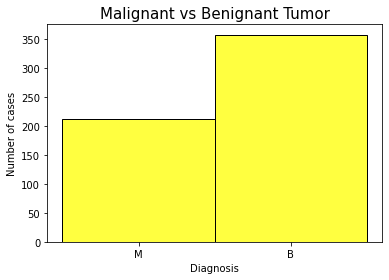

In [52]:
# Benignant vs Malignant tumor   

# Data
data = breast_cancer['Diagnosis']

# Chart
sns.histplot(data, color = 'yellow')
plt.title('Malignant vs Benignant Tumor', fontsize = 15)     
plt.ylabel('Number of cases') 
plt.show()

## **EXERCISE 1**

**STATEMENT** Grab a sports-themed dataset that you like and normalize categorical attributes in dummy. Normalize numeric attributes with StandardScaler.

**NORMALIZE CATEGORICAL ATTRIBUTES**

+ The diagnosis variable will take the value 1 depending on whether the tumor is benign or malignant.

In [53]:
# Dummies
dummies = pd.get_dummies(breast_cancer.Diagnosis)
dummies.head()

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


**NORMALIZE NUMERIC ATTRIBUTES**

+ To apply the standardization I only have to choose the numerical data. Our numeric data is all 'float64' as we have seen above

In [54]:
# Separate out numerical variables from the categorical variables

attributes = []

for column in breast_cancer:
    if breast_cancer[column].dtype == 'float64': 
        attributes.append(column)

breast_cancer[attributes] # Only numerical variables


,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [55]:
# Standard Scaler

scaler = StandardScaler()

breast_cancer_standardized = pd.DataFrame(scaler.fit_transform(breast_cancer[attributes].values))
breast_cancer_standardized.columns = attributes # Rename the columns with our Attribute

breast_cancer_standardized

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


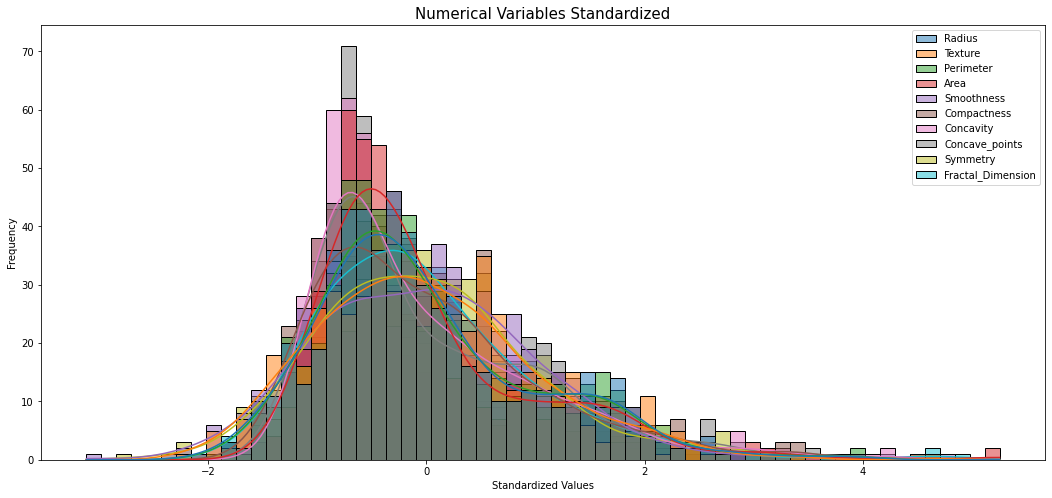

In [56]:
# Numerical variables' chart to see the distribution

# Data
data = breast_cancer_standardized

# Chart
plt.figure(figsize=(18,8))
sns.histplot(data, kde =True)
plt.title('Numerical Variables Standardized', fontsize = 15)     
plt.xlabel('Standardized Values') 
plt.ylabel('Frequency')
plt.show()

+ We see how the standardized variables have a distribution close to a normal distribution

**CONCATENATE NUMERICAL AND CATEGORICAL VARIABLES**

In [57]:
# Concatenate

breast_cancer_normalized = pd.concat([dummies, breast_cancer_standardized], axis = 1)
breast_cancer_normalized

,B,M,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,0,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,0,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,0,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,0,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,0,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,0,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


**EXERCISE CONCLUSION:** In this exercise we have learned to apply the dummies method for categorical variables and the variable standardization method for numerical attributes. This exercise try to help the ML algorithm to better understand the variables that we introduce and as a consequence that our model has greater precision.

## **EXERCISE 2**

**STATEMENT** Continue with the sports theme data set you like and apply the main component analysis (PCA).

In [58]:
# We must continue with our dataset standardized
breast_cancer_standardized.head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008


### **5 COMPONENTS (PCA)**

In [59]:
# PCA (We start with half of our columns)

pca = PCA(n_components=5)
principal_components = pca.fit_transform(breast_cancer_standardized)

# Convert to DF
breast_cancer_pca = pd.DataFrame(principal_components, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5']) 
breast_cancer_pca.head()


,PCA1,PCA2,PCA3,PCA4,PCA5
0,5.224155,3.204428,-2.171340,-0.169276,1.514252
1,1.728094,-2.540839,-1.019679,0.547539,0.312330
2,3.969757,-0.550075,-0.323569,0.397964,-0.322877
3,3.596713,6.905070,0.792832,-0.604828,0.243176
4,3.151092,-1.358072,-1.862234,-0.185251,0.311342


In [60]:
# We look at the percentage of variance that each component captures
pca.explained_variance_ratio_

array([0.5478588 , 0.25187136, 0.08806152, 0.04990094, 0.03725392])

+ When reducing the dimensionality of a dataset, part of the explained variance (the information given by the dataset) is usually lost. In our study we can see how the first 5 components are enough to explain 97,4% of the variance of the dataset. The rest of components are not capable to explain much.

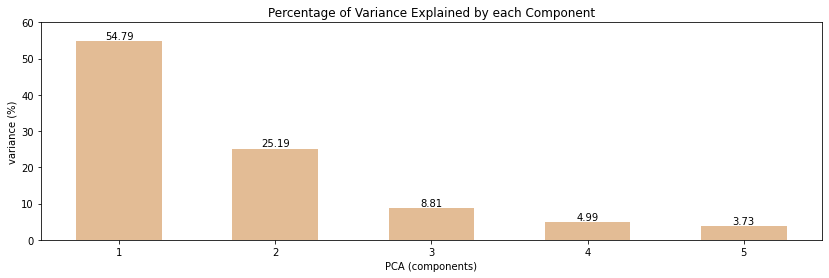

In [61]:
# Data
components = np.arange(pca.n_components_)+1
variance_components = (pca.explained_variance_ratio_)*100

# Chart
fig, ax = plt.subplots()
plot = ax.bar(components, variance_components, color = 'peru', alpha = 0.55, width = 0.55)
ax.set_ylabel('variance (%)')
ax.set_xlabel('PCA (components)')
ax.set_title('Percentage of Variance Explained by each Component')
ax.bar_label(plot, fmt = '%.2f')
ax.set_ylim(0,60)
fig.set_size_inches(14,4)
plt.show()

 + The first component (PCA1) maintains 54.79% of the variance of the data set.

+ The second component (PCA2) maintains 25.19% of the variance of the data set.

+ The third component (PCA3) maintains 8.81% of the variance of the data set.

+ The fourth component (PCA4) maintains 4.99% of the variance of the data set.

+ The fifth component (PCA5) maintains 3.73% of the variance of the data set.

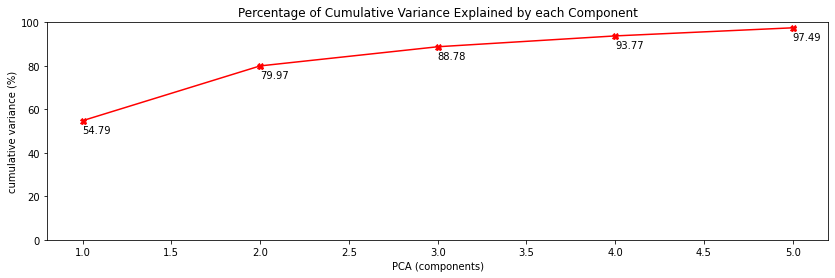

In [62]:
# ROC curve

# Data
components = np.arange(pca.n_components_ )+1
cumulative_variance_components = (pca.explained_variance_ratio_.cumsum())*100

# Chart
fig, ax = plt.subplots()
plot = ax.plot(components, cumulative_variance_components, color = 'red', marker = 'X')
for component, cumulative_variance_component in zip (components, cumulative_variance_components):
    label = round(cumulative_variance_component,2)
    ax.annotate(label, (component, cumulative_variance_component), textcoords = 'offset points', xytext = (0,-12))
ax.set_ylabel('cumulative variance (%)')
ax.set_xlabel('PCA (components)')
ax.set_title('Percentage of Cumulative Variance Explained by each Component')
ax.set_ylim(0,100)
fig.set_size_inches(14,4)
plt.show()


+ A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components: In our study with 5 components we can keep 97,5% of the variance of our data.

+ Two components are enough to keep almost 80% of the variance, we are going to study the case.

### **2 COMPONENTS (PCA)**

In [63]:
# Visualization of our standardized data

breast_cancer_standardized.head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008


In [64]:
# Standardized

scaler = StandardScaler()
pca_2 = PCA(n_components=2)

principal_components_2 = pca_2.fit_transform(breast_cancer_standardized)

# Convert to DF
breast_cancer_pca_2 = pd.DataFrame(principal_components_2, columns = ['PCA1','PCA2']) 
breast_cancer_pca_2.head()

,PCA1,PCA2
0,5.224155,3.204428
1,1.728094,-2.540839
2,3.969757,-0.550075
3,3.596713,6.905070
4,3.151092,-1.358072


In [65]:
# Adding our categorical variable 'Diagnosis'

breast_cancer_normalized = pd.concat([breast_cancer_pca_2, breast_cancer['Diagnosis']], axis = 1)
breast_cancer_normalized.head()

,PCA1,PCA2,Diagnosis
0,5.224155,3.204428,M
1,1.728094,-2.540839,M
2,3.969757,-0.550075,M
3,3.596713,6.905070,M
4,3.151092,-1.358072,M


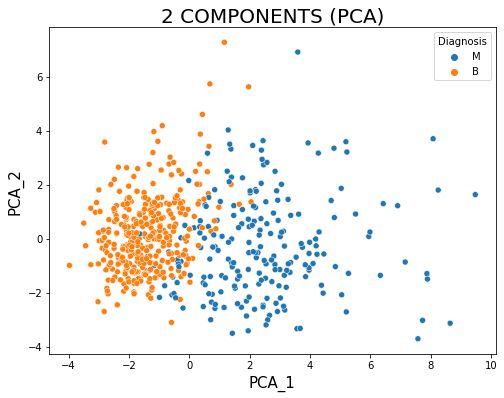

In [66]:
# Visualization

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=breast_cancer_normalized, x='PCA1', y='PCA2', hue="Diagnosis")
ax.set_xlabel('PCA_1', fontsize = 15)
ax.set_ylabel('PCA_2', fontsize = 15)
ax.set_title('2 COMPONENTS (PCA)', fontsize = 20)
plt.show()


+ As we have seen before, the sum of 2 components based on our data is only able to maintain the 80% variance case, so we conclude that it is not very precise. We can appreciate two clusters thanks to putting color to the observations depending on whether a patient's tumor is benignant or malignant. The cluster of benignant tumors is more concentrated, while the cluster of malignant tumors is much more dispersed with a great appearance of outliers.

+ It makes sense that the data of the variables (characteristics) of malignant tumors have higher values compared to benign tumors that more or less should oscillate within the same range, hence the outliers.

## **EXERCISE 3**

**STATEMENT** Continue with the sports theme data set you like and standardize the data taking into account the outliers.

+ We need to explore the data to see which variables concentrate the most outliers and what these types of outliers are like. As we have seen in the previous exercise, standardizing the data with 'StandardScaler' does not eliminate the presence of outliers. For this reason we will use different scaling methods in order to take into account the outliers.

In [67]:
# Original Dataset
breast_cancer.head(3)

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [68]:
# Description of all our variables
round(breast_cancer.describe(include = 'all'),2)

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
count,569,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06
std,NaN,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01
min,NaN,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05
25%,NaN,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06
50%,NaN,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06
75%,NaN,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07


+ Seeing the maximum and minimum values of each variable we can detect the presence of outliers.

In [69]:
# We want to plot numerical attributes
breast_cancer[attributes].head(2)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


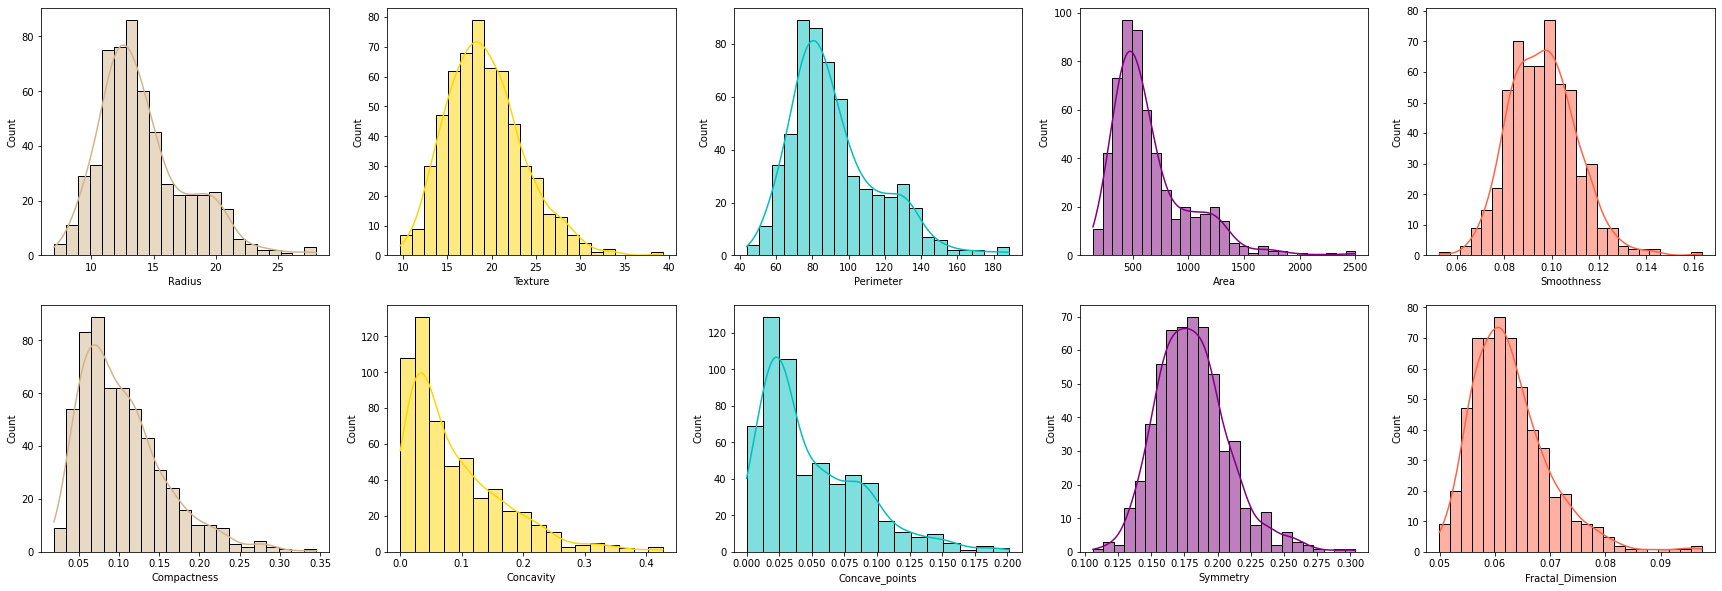

In [70]:
# Histplot the distribution
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

count = 0 # Refers to column x of 'breast cancer[attributes]'

for i in range (0,2):
    sns.histplot(breast_cancer[attributes].iloc[:, count], ax =ax[i,0], color= 'tan', kde=True) # ax[i,0] -> i (row), 0 the position within the row
    count +=1
    sns.histplot(breast_cancer[attributes].iloc[:, count], ax = ax[i,1], color= 'gold', kde=True)
    count +=1
    sns.histplot(breast_cancer[attributes].iloc[:, count], ax = ax[i,2], color= 'c', kde=True)
    count +=1
    sns.histplot(breast_cancer[attributes].iloc[:, count], ax = ax[i,3], color= 'purple', kde=True)
    count +=1
    sns.histplot(breast_cancer[attributes].iloc[:, count], ax = ax[i,4], color= 'tomato', kde=True)
    count +=1


    

+ We can see how the different variables present certain atypical values, since in many cases most of the data is concentrated in a few bins and then we see other data that is somewhat far from the mean.

### **HOW TO SOLVE OUTLIERS PROBLEM**

  + The first option is to eliminate all those atypical values or outliers. We will not do it since we consider that the outlier data in each variable are particular cases/characteristics of the attributes themselves.

  + The second option is to use a standardization method that does not take outliers into account, such as the **RobustScaler()** method. This scaler uses the median and IQR, instead of the mean and standard deviation.

  + The third option is to use the logarithm or the square root in order to transform the data and ensure that they are distributed in a more Gaussian way and maintain a constant variance. Another option would be to use a more precise data transformation such as Cox-Box, Yeo-Johnson, etc, but the latter must satisfy specific conditions.

#### **ROBUST SCALER**

+ As the name itself indicates, this estimator is resistant to outliers. When our data contains many outliers, scaling using the mean and SD of the data does not work well.

In [71]:
breast_cancer[attributes].head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


In [72]:
# Robust Scaler

scaler = RobustScaler()

breast_cancer_RobustScaler = pd.DataFrame(scaler.fit_transform(breast_cancer[attributes]))
breast_cancer_RobustScaler.columns = attributes
breast_cancer_RobustScaler.head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086


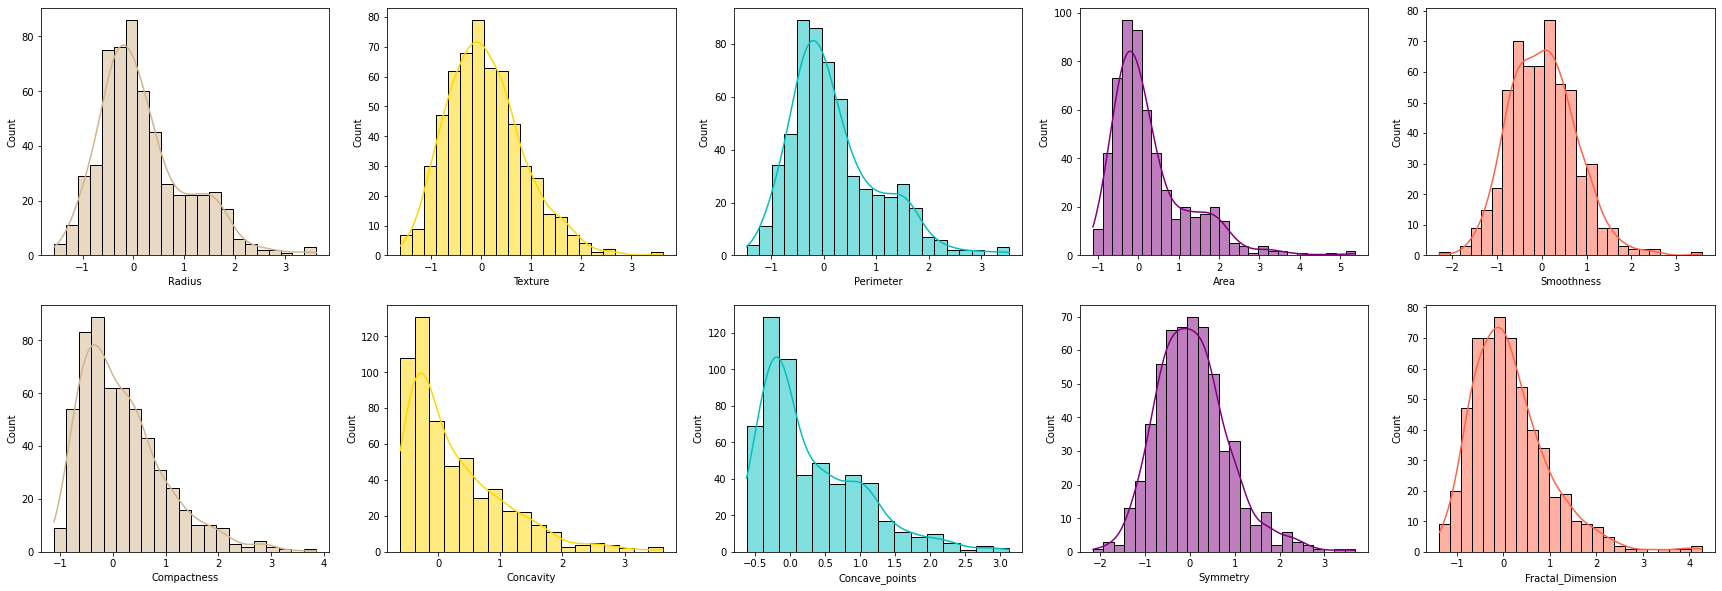

In [73]:
# Histplot the distribution
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

count = 0 

for i in range (0,2):
    sns.histplot(breast_cancer_RobustScaler[attributes].iloc[:, count], ax =ax[i,0], color= 'tan', kde=True) 
    count +=1
    sns.histplot(breast_cancer_RobustScaler[attributes].iloc[:, count], ax = ax[i,1], color= 'gold', kde=True)
    count +=1
    sns.histplot(breast_cancer_RobustScaler[attributes].iloc[:, count], ax = ax[i,2], color= 'c', kde=True)
    count +=1
    sns.histplot(breast_cancer_RobustScaler[attributes].iloc[:, count], ax = ax[i,3], color= 'purple', kde=True)
    count +=1
    sns.histplot(breast_cancer_RobustScaler[attributes].iloc[:, count], ax = ax[i,4], color= 'tomato', kde=True)
    count +=1

+ The results show graphically a identical distribution to the original data, but we have reduced the scale of the data with the aim that when applying a Machine Learning model there is no variable with more weight than the others due to the scales and outliers.

#### **TRANSFORM THE DATA**

##### **LOGARITHM**

+ Naperian logarithm helps us downscale the variables in order to reduce bias and outliers.

In [86]:
#  Log Transformer Scale
import numpy.ma as ma # As there are variables with values 0 and doing the logarithm gives an error, we carry out the mask

breast_cancer_log = pd.DataFrame(data = np.ma.log(breast_cancer[attributes].values).filled(0), columns=attributes)
breast_cancer_log.head(3)                            

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,-1.203640,-1.916643,-1.419231,-2.541985
1,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,-2.442997,-2.656834,-1.708154,-2.870510
2,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,-1.622523,-2.056507,-1.575520,-2.813577


##### **SQUARE ROOT**

+ Square root is another way to transform the data to a smaller scale and can help us to reduce bias.

In [90]:
# Square Root Transformer Scale

breast_cancer_sqrt = pd.DataFrame(np.sqrt(breast_cancer[attributes]))
breast_cancer_sqrt.head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,4.241462,3.221801,11.081516,31.638584,0.344093,0.526878,0.547814,0.383536,0.491833,0.280553
1,4.535416,4.215448,11.528226,36.414283,0.291101,0.280428,0.294788,0.264896,0.425676,0.238055
2,4.437342,4.609772,11.401754,34.684290,0.331059,0.399875,0.444297,0.357631,0.454863,0.244929


+ To determine which transformation method we are left with, we will use the skew() function, which will help us determine which of the two has a smaller bias and, as a consequence, will be the one chosen to perform the scaler().

In [95]:
# Skew 

print('The bias of the original variables are:', '\n',breast_cancer[attributes].skew(),'\n')
print('The bias of the logarithmic variables are:', '\n',breast_cancer_log[attributes].skew(),'\n')
print('The bias of the square root variables are:', '\n',breast_cancer_sqrt[attributes].skew(),'\n')

The bias of the original variables are: 
 Radius               0.942380
Texture              0.650450
Perimeter            0.990650
Area                 1.645732
Smoothness           0.456324
Compactness          1.190123
Concavity            1.401180
Concave_points       1.171180
Symmetry             0.725609
Fractal_Dimension    1.304489
dtype: float64 

The bias of the logarithmic variables are: 
 Radius               0.305969
Texture             -0.013875
Perimeter            0.321425
Area                 0.284957
Smoothness          -0.067816
Compactness         -0.034086
Concavity           -0.560112
Concave_points       0.350819
Symmetry             0.165701
Fractal_Dimension    0.853573
dtype: float64 

The bias of the square root variables are: 
 Radius               0.622870
Texture              0.309895
Perimeter            0.653536
Area                 0.933839
Smoothness           0.190934
Compactness          0.564793
Concavity            0.360016
Concave_points       0.2

+ We can see how by applying the logarithm to the variables of the original datset we obtain a lower bias than applying the square root. Once we have the transformed data, we are going to proceed to scale it with the 'MinMaxScaler()' scalar method, which is responsible for maintaining all the values between a range of [0,1], so that when applying a Machine Learning method there is no variable with more weight than another.

+ Thanks to the logarithm, the outliers will have values closer to the 'normal' values so that by applying the minimum and maximum method we manage to reduce the bias.

##### **MinMaxScaler**

In [98]:
# MinMaxScaler()

scaler = MinMaxScaler()

breast_cancer_MinMaxScaler = pd.DataFrame(scaler.fit_transform(breast_cancer_log))
breast_cancer_MinMaxScaler.columns = attributes
breast_cancer_MinMaxScaler.head(3)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_Dimension
0,0.679590,0.047744,0.706417,0.679617,0.715660,0.924136,0.834572,0.695359,0.783119,0.680446
1,0.775803,0.432436,0.760565,0.777992,0.420421,0.486255,0.664235,0.577710,0.508892,0.188652
2,0.744414,0.560406,0.745451,0.743931,0.647490,0.732628,0.777001,0.673129,0.634780,0.273879


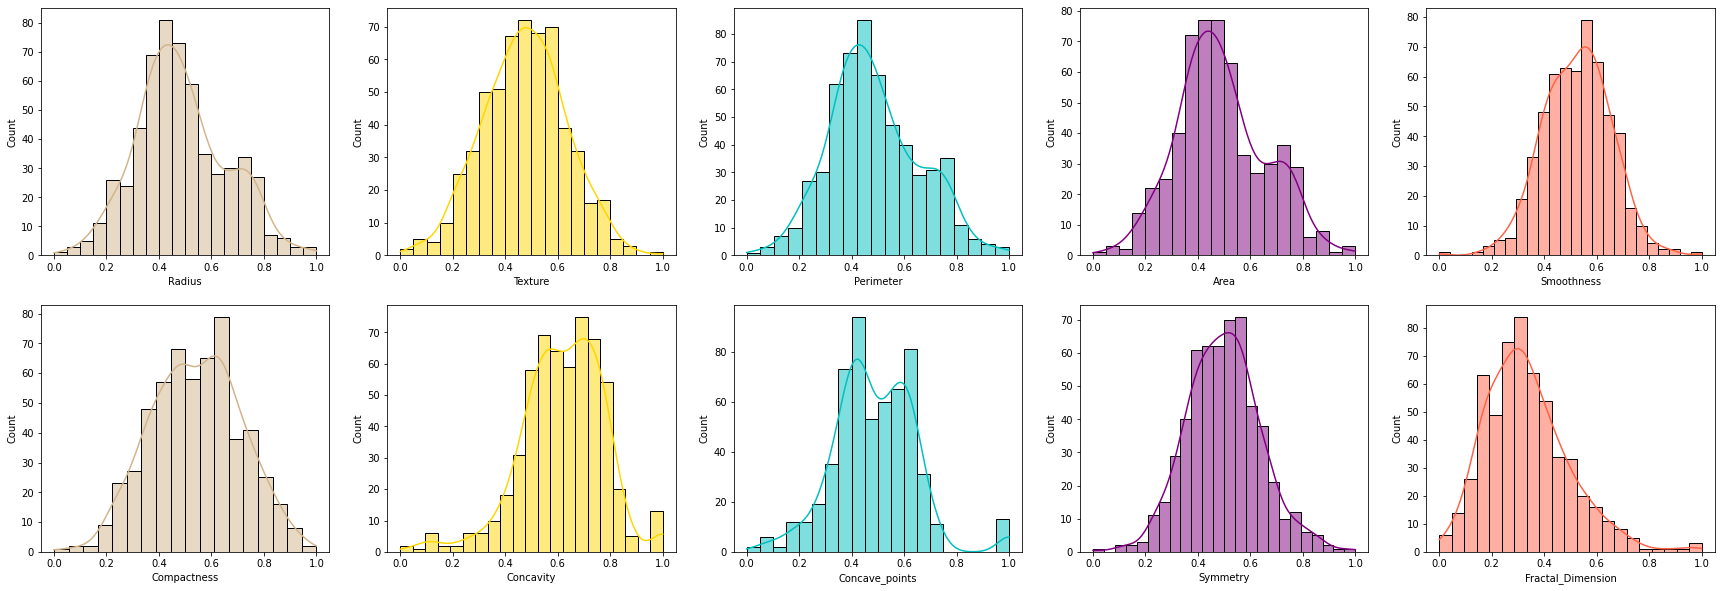

In [99]:
# Histplot the distribution
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

count = 0 

for i in range (0,2):
    sns.histplot(breast_cancer_MinMaxScaler[attributes].iloc[:, count], ax =ax[i,0], color= 'tan', kde=True) 
    count +=1
    sns.histplot(breast_cancer_MinMaxScaler[attributes].iloc[:, count], ax = ax[i,1], color= 'gold', kde=True)
    count +=1
    sns.histplot(breast_cancer_MinMaxScaler[attributes].iloc[:, count], ax = ax[i,2], color= 'c', kde=True)
    count +=1
    sns.histplot(breast_cancer_MinMaxScaler[attributes].iloc[:, count], ax = ax[i,3], color= 'purple', kde=True)
    count +=1
    sns.histplot(breast_cancer_MinMaxScaler[attributes].iloc[:, count], ax = ax[i,4], color= 'tomato', kde=True)
    count +=1